In [29]:
import math
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [16]:
df_voos = pd.read_csv("dados/refined/voos_sp_rj_2406_2412.csv", sep=",")

In [28]:
df_reclamacoes = pd.read_csv("dados/refined/reclamacoes_2406_2412.csv", sep=",")

In [17]:
df_voos.head()

,SIGLA ICAO EMPRESA AEREA,EMPRESA AEREA,NUMERO VOO,CODIGO DI,CODIGO TIPO LINHA,MODELO EQUIPAMENTO,NUMERO DE ASSENTOS,SIGLA AEROPORTO ORIGEM,PARTIDA PREVISTA,PARTIDA REAL,...,CIAD DEST,NOME DEST,MUNICIPIO DEST,UF DEST,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,HORA PARTIDA REAL,CLUSTER_HORA,AQO
0,ACN,AZUL CONECTA LTDA,5121,0,N,C208,9.0,SBSP,01/06/2024 06:25,2024-06-01 06:20:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,06:20:00,4.0,3087.278232
1,ACN,AZUL CONECTA LTDA,5232,0,N,C208,9.0,SBSP,01/06/2024 10:45,2024-06-01 10:40:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,10:40:00,6.0,3087.278232
2,ACN,AZUL CONECTA LTDA,5114,0,N,C208,9.0,SBSP,02/06/2024 15:40,2024-06-02 15:38:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,15:38:00,8.0,3087.278232
3,ACN,AZUL CONECTA LTDA,5220,0,N,C208,9.0,SBSP,02/06/2024 13:40,2024-06-02 13:33:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,13:33:00,7.0,3087.278232
4,ACN,AZUL CONECTA LTDA,5226,0,N,C208,9.0,SBSP,02/06/2024 20:10,2024-06-02 20:17:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,20:17:00,11.0,3087.278232


In [18]:
df_voos.sample(5)

,SIGLA ICAO EMPRESA AEREA,EMPRESA AEREA,NUMERO VOO,CODIGO DI,CODIGO TIPO LINHA,MODELO EQUIPAMENTO,NUMERO DE ASSENTOS,SIGLA AEROPORTO ORIGEM,PARTIDA PREVISTA,PARTIDA REAL,...,CIAD DEST,NOME DEST,MUNICIPIO DEST,UF DEST,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,HORA PARTIDA REAL,CLUSTER_HORA,AQO
7215,TAM,LATAM AIRLINES (TAM),3932,0,N,A319,144.0,SBSP,23/09/2024 19:30,2024-09-23 19:23:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,19:23:00,10.0,52656.118920
2591,GLO,GOL LINHAS AEREAS,1038,0,N,B737,138.0,SBSP,11/07/2024 17:35,2024-07-11 17:29:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,17:29:00,9.0,50462.113965
10071,GLO,GOL LINHAS AEREAS,1040,0,N,B738,186.0,SBSP,17/11/2024 18:25,2024-11-17 18:25:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,18:25:00,10.0,68014.153605
3136,TAM,LATAM AIRLINES (TAM),3932,0,N,A319,144.0,SBSP,04/07/2024 19:30,2024-07-04 19:23:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,19:23:00,10.0,52656.118920
6569,GLO,GOL LINHAS AEREAS,1002,0,N,B738,186.0,SBSP,23/09/2024 06:20,2024-09-23 06:18:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,06:18:00,4.0,68014.153605


In [19]:
df_voos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12693 entries, 0 to 12692
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SIGLA ICAO EMPRESA AEREA  12693 non-null  object 
 1   EMPRESA AEREA             12693 non-null  object 
 2   NUMERO VOO                12693 non-null  object 
 3   CODIGO DI                 12693 non-null  int64  
 4   CODIGO TIPO LINHA         12693 non-null  object 
 5   MODELO EQUIPAMENTO        12693 non-null  object 
 6   NUMERO DE ASSENTOS        12693 non-null  float64
 7   SIGLA AEROPORTO ORIGEM    12693 non-null  object 
 8   PARTIDA PREVISTA          12693 non-null  object 
 9   PARTIDA REAL              12683 non-null  object 
 10  SIGLA AEROPORTO DESTINO   12693 non-null  object 
 11  CHEGADA PREVISTA          12693 non-null  object 
 12  CHEGADA REAL              12693 non-null  object 
 13  SITUACAO VOO              12693 non-null  object 
 14  JUSTIF

In [20]:
df_voos.shape

(12693, 36)

In [21]:
df_voos.dtypes

SIGLA ICAO EMPRESA AEREA     object
EMPRESA AEREA                object
NUMERO VOO                   object
CODIGO DI                     int64
CODIGO TIPO LINHA            object
MODELO EQUIPAMENTO           object
NUMERO DE ASSENTOS          float64
SIGLA AEROPORTO ORIGEM       object
PARTIDA PREVISTA             object
PARTIDA REAL                 object
SIGLA AEROPORTO DESTINO      object
CHEGADA PREVISTA             object
CHEGADA REAL                 object
SITUACAO VOO                 object
JUSTIFICATIVA                object
REFERENCIA                   object
SITUACAO PARTIDA             object
SITUACAO CHEGADA             object
CODIGO OACI_x                object
CIAD ORIG                    object
NOME ORIG                    object
MUNICIPIO ORIG               object
UF ORIG                      object
LATITUDE ORIG               float64
LONGITUDE ORIG              float64
CODIGO OACI_y                object
CIAD DEST                    object
NOME DEST                   

In [22]:
df_voos.describe()

,CODIGO DI,NUMERO DE ASSENTOS,LATITUDE ORIG,LONGITUDE ORIG,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,CLUSTER_HORA,AQO
count,12693.0,12693.000000,1.269300e+04,1.269300e+04,12693.000000,12693.000000,12693.000000,12683.000000,12693.000000
mean,0.0,140.540928,-2.362611e+01,-4.665639e+01,-22.910837,-43.186354,363.284030,7.474966,51313.693714
std,0.0,48.577617,3.552854e-15,7.105707e-15,0.033800,0.061173,6.496951,2.329619,17777.100364
min,0.0,9.000000,-2.362611e+01,-4.665639e+01,-22.987500,-43.370000,343.030915,3.000000,3087.278232
25%,0.0,118.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,5.000000,43148.764115
50%,0.0,144.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,8.000000,52656.118920
75%,0.0,186.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,10.000000,68014.153605
max,0.0,186.000000,-2.362611e+01,-4.665639e+01,-22.810000,-43.162500,365.667493,12.000000,68014.153605


In [23]:
df_voos["NUMERO DE ASSENTOS"].nunique()

8

### Graficos:

- Gráfico de linha com duas linhas: eixo x horas do dia e eixo y numero de voos 1 linha latam 2 linha outras companhias

- Grafico de barras + filtro: Filtro por Cluster de horario + Grafico de barras com top 5 empresas com maior disponibilidade de assentos por horario e uma sexta barra com a disponibilidade da LATAM

- Matriz de correlação para identificar o que mais causou reclamações em cada mes


### Notas:

- Realizar estudo para entender a importancia do tamanho do avião


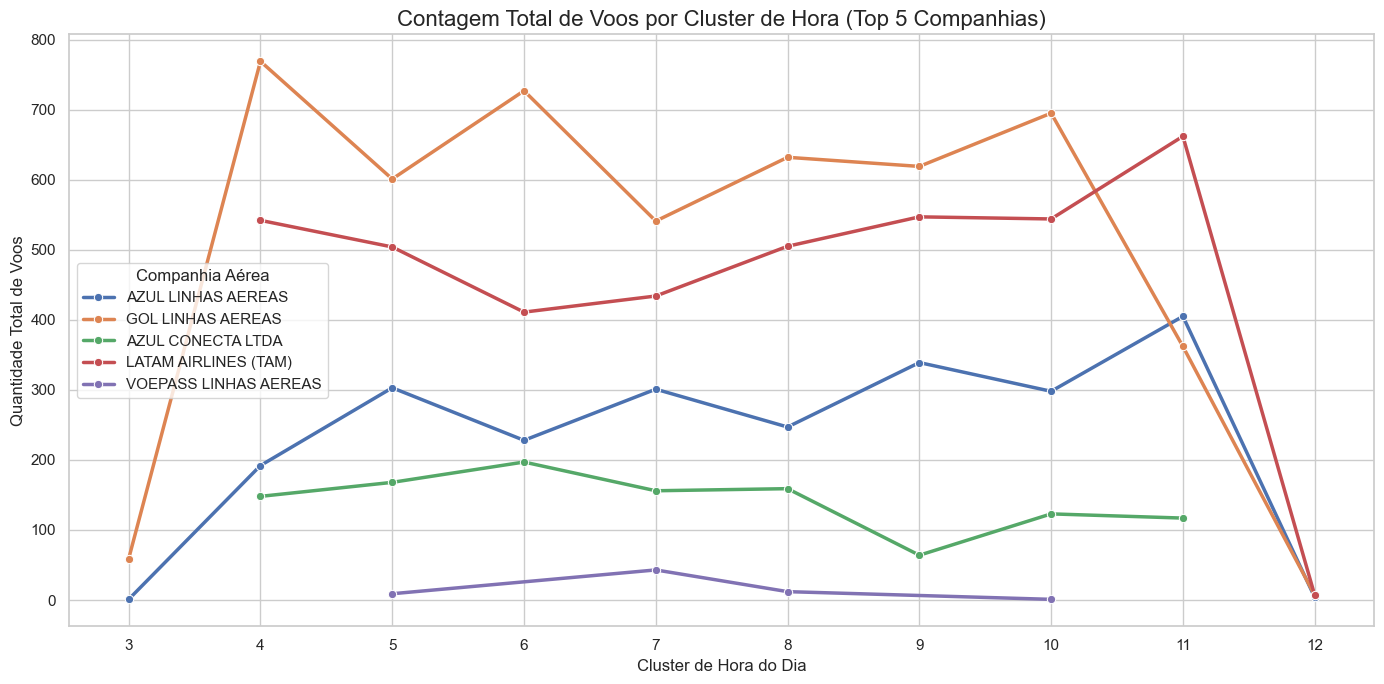

In [24]:
dados_para_grafico = df_voos.groupby(['CLUSTER_HORA', 'EMPRESA AEREA']).size().reset_index(name='total_voos')
        
        # Opcional: Salvar este DataFrame de resumo para usar no Grafana depois
        # dados_para_grafico.to_csv('resumo_voos_por_hora_top5.csv', index=False)
        # print("   - DataFrame de resumo salvo em 'resumo_voos_por_hora_top5.csv'")

        # --- PASSO 3: Criar o Gráfico ---


        # Configura o estilo do gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

        # Cria o gráfico de linha com o Seaborn
        # O parâmetro 'hue' é a mágica que cria uma linha para cada empresa
ax = sns.lineplot(
            data=dados_para_grafico,
            x='CLUSTER_HORA',
            y='total_voos',
            hue='EMPRESA AEREA',
            marker='o',  # Adiciona um marcador de ponto em cada dado
            linewidth=2.5
        )

        # Melhora a aparência do gráfico
plt.title('Contagem Total de Voos por Cluster de Hora (Top 5 Companhias)', fontsize=16)
plt.xlabel('Cluster de Hora do Dia', fontsize=12)
plt.ylabel('Quantidade Total de Voos', fontsize=12)
        
        # Garante que o eixo X mostre todos os números inteiros dos clusters
ax.set_xticks(dados_para_grafico['CLUSTER_HORA'].unique())
plt.legend(title='Companhia Aérea')
plt.tight_layout() # Ajusta o layout para não cortar os títulos


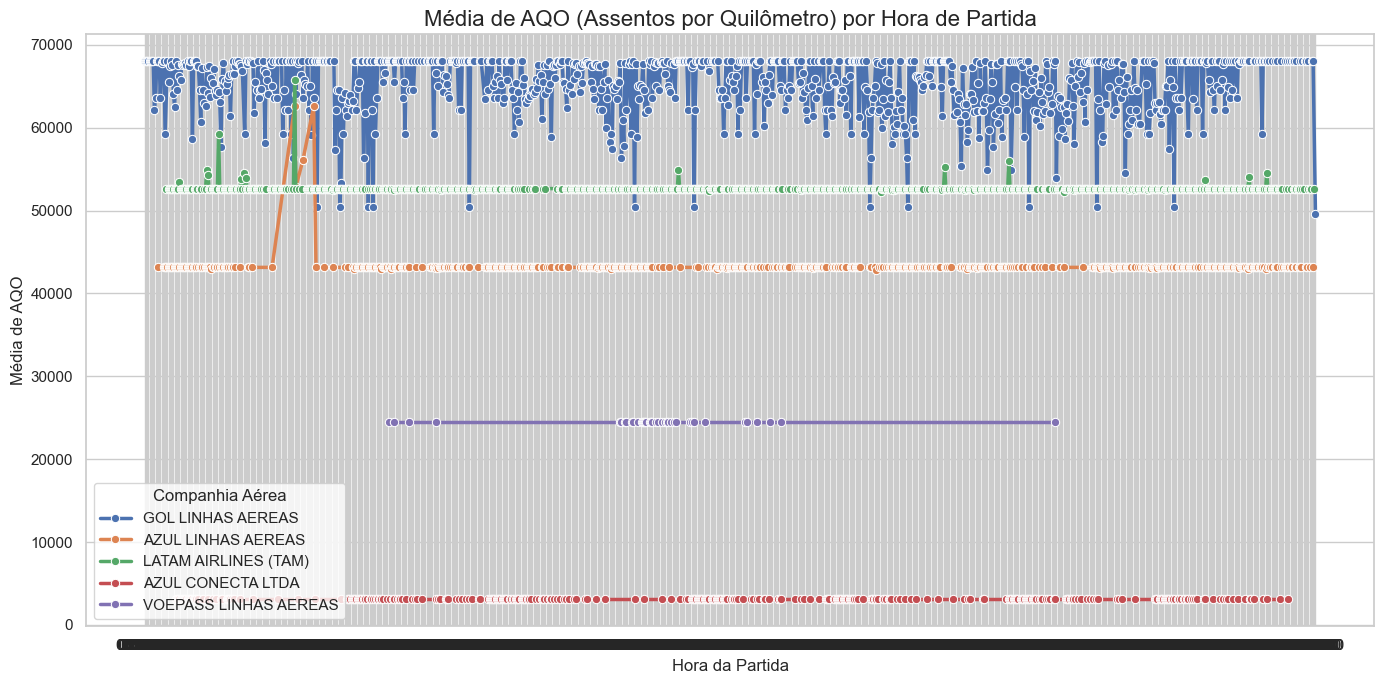

In [25]:


# Agora, calculamos a média de AQO para cada hora e cada empresa.
dados_para_grafico = df_voos.groupby(['HORA PARTIDA REAL', 'EMPRESA AEREA'])['AQO'].mean().reset_index()


# --- PASSO 2: Criar o Gráfico ---
# Configura o estilo e o tamanho
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Cria o gráfico de linha com o Seaborn
# x -> HORA (a coluna numérica que criamos)
# y -> AQO (os valores da média que calculamos)
# hue -> EMPRESA AEREA (para criar uma linha por empresa)
ax = sns.lineplot(
    data=dados_para_grafico,
    x='HORA PARTIDA REAL',
    y='AQO',
    hue='EMPRESA AEREA',
    marker='o',  # Adiciona um marcador de ponto em cada dado
    linewidth=2.5
)

# --- PASSO 3: Melhorar a aparência do gráfico ---
plt.title('Média de AQO (Assentos por Quilômetro) por Hora de Partida', fontsize=16)
plt.xlabel('Hora da Partida', fontsize=12)
plt.ylabel('Média de AQO', fontsize=12)

# Garante que o eixo X mostre todos os números inteiros das horas
if not dados_para_grafico.empty:
    ax.set_xticks(dados_para_grafico['HORA PARTIDA REAL'].unique())

plt.legend(title='Companhia Aérea')
plt.tight_layout() # Ajusta o layout para não cortar os títulos

# Mostra o gráfico
plt.show()

# Se preferir salvar em um arquivo, troque plt.show() por:
# plt.savefig('grafico_aqo_por_hora.png')

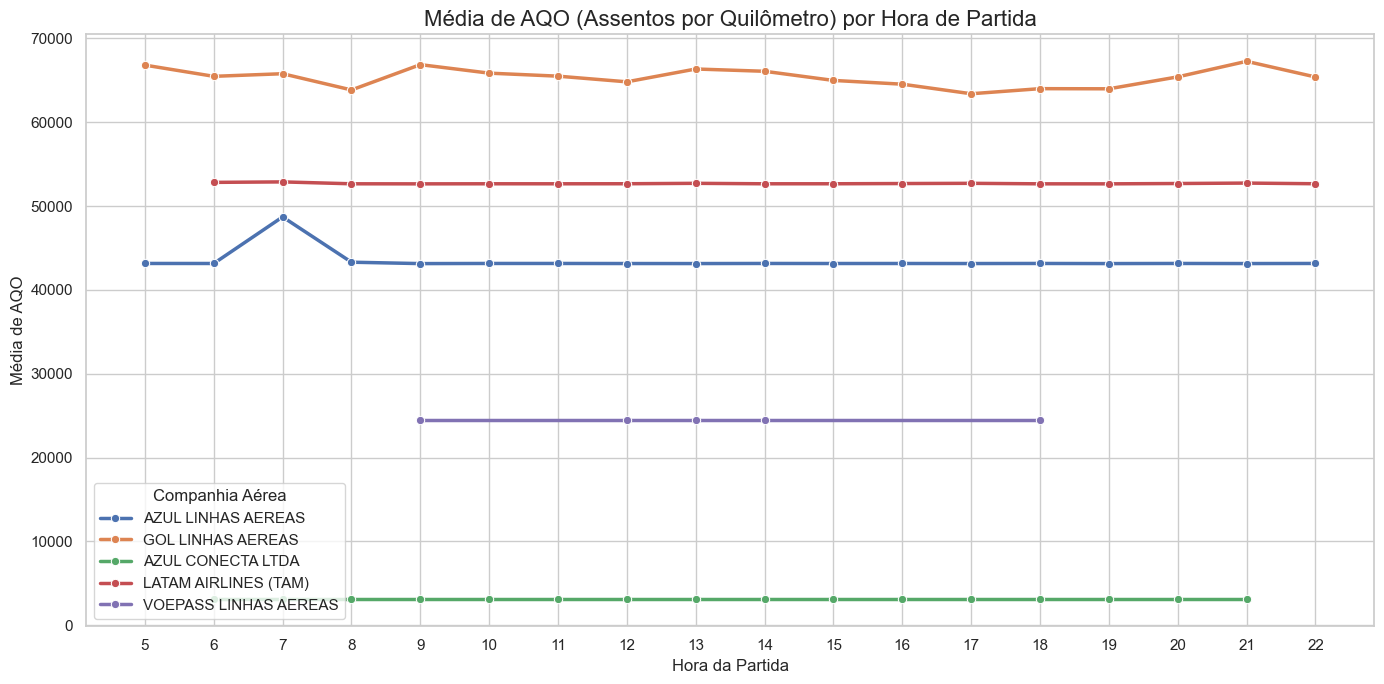

In [26]:

# --- PASSO 1: Preparar os dados para o gráfico ---
# A coluna 'HORA PARTIDA REAL' é um texto (ex: '06:20:00'). Para o gráfico, 
# precisamos agrupar todos os voos que saíram durante a hora 6, a hora 7, etc.
# Por isso, criamos uma coluna numérica 'HORA' apenas com a hora da partida.
df_voos['HORA'] = pd.to_datetime(df_voos['HORA PARTIDA REAL'], format='%H:%M:%S').dt.hour

# Agora, calculamos a média de AQO para cada hora e cada empresa.
dados_para_grafico = df_voos.groupby(['HORA', 'EMPRESA AEREA'])['AQO'].mean().reset_index()


# --- PASSO 2: Criar o Gráfico ---
# Configura o estilo e o tamanho
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Cria o gráfico de linha com o Seaborn
# x -> HORA (a coluna numérica que criamos)
# y -> AQO (os valores da média que calculamos)
# hue -> EMPRESA AEREA (para criar uma linha por empresa)
ax = sns.lineplot(
    data=dados_para_grafico,
    x='HORA',
    y='AQO',
    hue='EMPRESA AEREA',
    marker='o',  # Adiciona um marcador de ponto em cada dado
    linewidth=2.5
)

# --- PASSO 3: Melhorar a aparência do gráfico ---
plt.title('Média de AQO (Assentos por Quilômetro) por Hora de Partida', fontsize=16)
plt.xlabel('Hora da Partida', fontsize=12)
plt.ylabel('Média de AQO', fontsize=12)

# Garante que o eixo X mostre todos os números inteiros das horas
if not dados_para_grafico.empty:
    ax.set_xticks(dados_para_grafico['HORA'].unique())

plt.legend(title='Companhia Aérea')
plt.tight_layout() # Ajusta o layout para não cortar os títulos

# Mostra o gráfico
plt.show()

# Se preferir salvar em um arquivo, troque plt.show() por:
# plt.savefig('grafico_aqo_por_hora.png')

Dados processados para o gráfico comparativo:
    data_mes          NOME FANTASIA  total_reclamacoes
0 2024-06-01     AZUL LINHAS AEREAS               2597
1 2024-06-01      GOL LINHAS AEREAS               1202
2 2024-06-01   LATAM AIRLINES (TAM)               2126
3 2024-06-01  VOEPASS LINHAS AEREAS                 47
4 2024-07-01     AZUL LINHAS AEREAS               2344


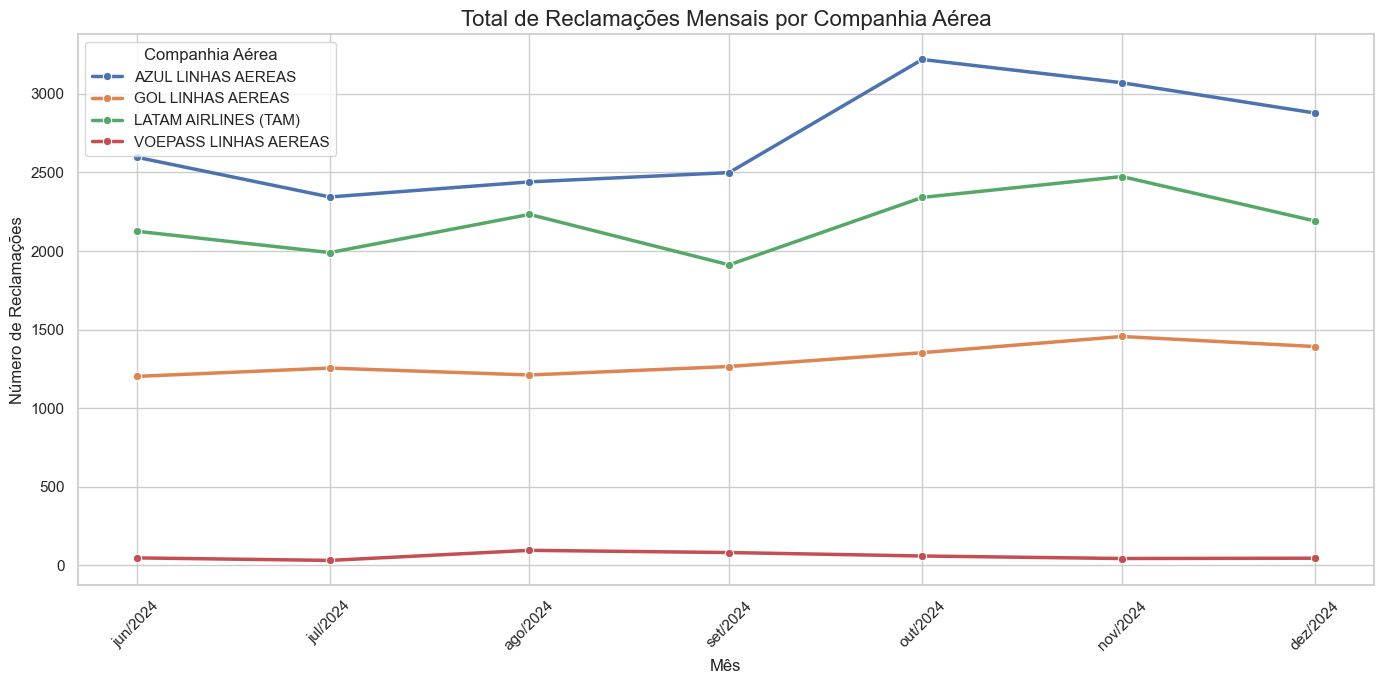

In [31]:
# PASSO 1: Identificar e filtrar as 5 empresas com mais reclamações
top5_empresas = df_reclamacoes['NOME FANTASIA'].value_counts().head(5).index
df_top5 = df_reclamacoes[df_reclamacoes['NOME FANTASIA'].isin(top5_empresas)].copy()

# PASSO 2: Criar uma coluna de data para o eixo do tempo
df_top5['data_mes'] = pd.to_datetime(
    df_top5['ANO ABERTURA'].astype(str) + '-' + df_top5['MES ABERTURA'].astype(str) + '-01'
)

# PASSO 3: Agrupar por mês E POR EMPRESA, e contar as reclamações
reclamacoes_por_mes_empresa = df_top5.groupby(['data_mes', 'NOME FANTASIA']).size().reset_index(name='total_reclamacoes')

# PASSO 4: Gerar o gráfico comparativo para validação
print("Dados processados para o gráfico comparativo:")
print(reclamacoes_por_mes_empresa.head())

# Configurações do gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Criação do gráfico de linha com uma linha por empresa usando o parâmetro 'hue'
ax = sns.lineplot(
    data=reclamacoes_por_mes_empresa,
    x='data_mes',
    y='total_reclamacoes',
    hue='NOME FANTASIA',  # A mágica acontece aqui!
    marker='o',
    linewidth=2.5
)

# Melhorando a aparência
plt.title('Total de Reclamações Mensais por Companhia Aérea', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Reclamações', fontsize=12)
plt.xticks(rotation=45)

# Formata o eixo X para mostrar "Mês/Ano"
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato 'Jan/2025'
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Um tick por mês

plt.tight_layout()
plt.legend(title='Companhia Aérea')
plt.show()
